In [ ]:
# Import required libraries

import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [ ]:
# importing data set
df = pd.read_csv("/Users/uvini/Downloads/Labelled.csv",index_col=0)
# observing
df.head()

,content,fileclass
0,\t\t\t\t\t\t\t\tDigital\tand\tSocial\tMedia\t\...,DigitalInclusion
1,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,"DigitalLiteracy, Upskilling"
2,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,DigitalFinance
3,\n \n \n \n \n \n \n \n \n \nFINANCIAL INCLUS...,"DigitalFinance, DigitalInclusion"
4,\n \n \n \n \n \n \n \n \n \n \n \n \n \...,"DigitalFinance, DigitalInclusion"


In [ ]:
# lowercasing
df["content"] = df["content"].str.lower()
df.head()

,content,fileclass
0,\t\t\t\t\t\t\t\tdigital\tand\tsocial\tmedia\t\...,DigitalInclusion
1,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,"DigitalLiteracy, Upskilling"
2,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,DigitalFinance
3,\n \n \n \n \n \n \n \n \n \nfinancial inclus...,"DigitalFinance, DigitalInclusion"
4,\n \n \n \n \n \n \n \n \n \n \n \n \n \...,"DigitalFinance, DigitalInclusion"


In [ ]:
# removing urls

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
 
df["content"] = df["content"].apply(lambda text: remove_urls(text))

df.head()

,content,fileclass
0,\t\t\t\t\t\t\t\tdigital\tand\tsocial\tmedia\t\...,DigitalInclusion
1,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,"DigitalLiteracy, Upskilling"
2,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,DigitalFinance
3,\n \n \n \n \n \n \n \n \n \nfinancial inclus...,"DigitalFinance, DigitalInclusion"
4,\n \n \n \n \n \n \n \n \n \n \n \n \n \...,"DigitalFinance, DigitalInclusion"


In [ ]:
# remove html tags
from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "lxml").text

df["content"] = df["content"].apply(lambda text: remove_html(text))

df.head()

,content,fileclass
0,digital\tand\tsocial\tmedia\t\tfor\tsocial\tan...,DigitalInclusion
1,teachers' attitude towards integrating ict in ...,"DigitalLiteracy, Upskilling"
2,papua new guinea \nfinancial consumer protect...,DigitalFinance
3,financial inclusion in the maldives \nfindex ...,"DigitalFinance, DigitalInclusion"
4,draft final report \n \n \ncan discounted wit...,"DigitalFinance, DigitalInclusion"


In [ ]:
# remove emails

def remove_emails(text):
    email_pattern = re.compile(r'\S+@\S+')
    return email_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_emails(text))
df.head()

,content,fileclass
0,digital\tand\tsocial\tmedia\t\tfor\tsocial\tan...,DigitalInclusion
1,teachers' attitude towards integrating ict in ...,"DigitalLiteracy, Upskilling"
2,papua new guinea \nfinancial consumer protect...,DigitalFinance
3,financial inclusion in the maldives \nfindex ...,"DigitalFinance, DigitalInclusion"
4,draft final report \n \n \ncan discounted wit...,"DigitalFinance, DigitalInclusion"


In [ ]:
# remove stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# read in custom stopwords list from text file
with open('/Users/uvini/Downloads/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["content"] = df["content"].apply(lambda text: remove_stopwords(text))
df.head()

,content,fileclass
0,digital social media social behaviour change c...,DigitalInclusion
1,teachers' attitude integrating ict classroom i...,"DigitalLiteracy, Upskilling"
2,papua guinea financial consumer protection dia...,DigitalFinance
3,financial inclusion maldives findex 2018 surve...,"DigitalFinance, DigitalInclusion"
4,draft final discounted withdrawal fees catalys...,"DigitalFinance, DigitalInclusion"


In [ ]:
# remove punctuations

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["content"] = df["content"].apply(lambda text: remove_punctuation(text))
df.head()

,content,fileclass
0,digital social media social behaviour change c...,DigitalInclusion
1,teachers attitude integrating ict classroom in...,"DigitalLiteracy, Upskilling"
2,papua guinea financial consumer protection dia...,DigitalFinance
3,financial inclusion maldives findex 2018 surve...,"DigitalFinance, DigitalInclusion"
4,draft final discounted withdrawal fees catalys...,"DigitalFinance, DigitalInclusion"


In [ ]:
# remove numbers

def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_numbers(text))
df.head()


,content,fileclass
0,digital social media social behaviour change c...,DigitalInclusion
1,teachers attitude integrating ict classroom in...,"DigitalLiteracy, Upskilling"
2,papua guinea financial consumer protection dia...,DigitalFinance
3,financial inclusion maldives findex survey se...,"DigitalFinance, DigitalInclusion"
4,draft final discounted withdrawal fees catalys...,"DigitalFinance, DigitalInclusion"


In [ ]:
def remove_non_alpha(text):
    non_alpha_pattern = re.compile(r'[^a-zA-Z\s]')
    return non_alpha_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_non_alpha(text))
df.head()

,content,fileclass
0,digital social media social behaviour change c...,DigitalInclusion
1,teachers attitude integrating ict classroom in...,"DigitalLiteracy, Upskilling"
2,papua guinea financial consumer protection dia...,DigitalFinance
3,financial inclusion maldives findex survey se...,"DigitalFinance, DigitalInclusion"
4,draft final discounted withdrawal fees catalys...,"DigitalFinance, DigitalInclusion"


In [ ]:
# remove extra white space
def remove_extra_whitespaces(text):
    whitespace_pattern = re.compile(r'\s+')
    return whitespace_pattern.sub(' ', text)

df["content"] = df["content"].apply(lambda text: remove_extra_whitespaces(text))
df.head()

,content,fileclass
0,digital social media social behaviour change c...,DigitalInclusion
1,teachers attitude integrating ict classroom in...,"DigitalLiteracy, Upskilling"
2,papua guinea financial consumer protection dia...,DigitalFinance
3,financial inclusion maldives findex survey sep...,"DigitalFinance, DigitalInclusion"
4,draft final discounted withdrawal fees catalys...,"DigitalFinance, DigitalInclusion"


In [ ]:
# remove one letter word such as e a l
def remove_single_letter_words(text):
    return " ".join([word for word in str(text).split() if len(word) > 1])

df["content"] = df["content"].apply(lambda text: remove_single_letter_words(text))
df.head()

,content,fileclass
0,digital social media social behaviour change c...,DigitalInclusion
1,teachers attitude integrating ict classroom in...,"DigitalLiteracy, Upskilling"
2,papua guinea financial consumer protection dia...,DigitalFinance
3,financial inclusion maldives findex survey sep...,"DigitalFinance, DigitalInclusion"
4,draft final discounted withdrawal fees catalys...,"DigitalFinance, DigitalInclusion"


In [ ]:
# # remove non english text
# from langdetect import detect

# def remove_non_english(text):
#     words = text.split()
#     english_words = [word for word in words if detect(word)=='en']
#     return " ".join(english_words)

# df["content"] = df["content"].apply(lambda text: remove_non_english(text))
# df.head()

In [ ]:
# remove frequent words

from collections import Counter
cnt = Counter()
for text in df["content"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(25)

[('data', 39703),
 ('digital', 39095),
 ('mobile', 21039),
 ('services', 19990),
 ('development', 19415),
 ('financial', 16368),
 ('health', 15578),
 ('access', 15362),
 ('social', 14396),
 ('online', 14267),
 ('countries', 14235),
 ('internet', 14023),
 ('technology', 13540),
 ('government', 11944),
 ('public', 11375),
 ('women', 10902),
 ('system', 10842),
 ('bank', 10821),
 ('al', 10501),
 ('national', 10377),
 ('sector', 10273),
 ('international', 10266),
 ('business', 10233),
 ('support', 10047),
 ('study', 9989)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(25)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["content"] = df["content"].apply(lambda text: remove_freqwords(text))
df.head()

,content,fileclass
0,media behaviour change communication linda raf...,DigitalInclusion
1,teachers attitude integrating ict classroom in...,"DigitalLiteracy, Upskilling"
2,papua guinea consumer protection diagnostic pa...,DigitalFinance
3,inclusion maldives findex survey september dis...,"DigitalFinance, DigitalInclusion"
4,draft final discounted withdrawal fees catalys...,"DigitalFinance, DigitalInclusion"


In [ ]:
cnt = Counter()
for text in df["content"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common()[-173000:]

[('enition', 17),
 ('termos', 17),
 ('jstpm', 17),
 ('naslund', 17),
 ('kumaraguru', 17),
 ('decrypted', 17),
 ('nyamira', 17),
 ('dfa', 17),
 ('entropy', 17),
 ('aljazeera', 17),
 ('pmid', 17),
 ('gamers', 17),
 ('amesjmir', 17),
 ('purposeszaidi', 17),
 ('neda', 17),
 ('fujcfsa', 17),
 ('assetbased', 17),
 ('ysu', 17),
 ('srlms', 17),
 ('hamad', 17),
 ('delitos', 17),
 ('growthsource', 17),
 ('louderback', 17),
 ('goode', 17),
 ('lowry', 17),
 ('ccri', 17),
 ('scambaiters', 17),
 ('reconceptualization', 17),
 ('backpage', 17),
 ('effectsayes', 17),
 ('psbc', 17),
 ('microcontrollers', 17),
 ('nkk', 17),
 ('bragazzi', 17),
 ('rencana', 17),
 ('mojokerto', 17),
 ('springster', 16),
 ('aida', 16),
 ('tying', 16),
 ('productively', 16),
 ('willingly', 16),
 ('proximate', 16),
 ('inspiring', 16),
 ('honesty', 16),
 ('selfies', 16),
 ('backfire', 16),
 ('personas', 16),
 ('abreu', 16),
 ('groupbased', 16),
 ('debrief', 16),
 ('deems', 16),
 ('schuster', 16),
 ('parliaments', 16),
 ('sch', 

In [ ]:
rare_words = set([w for (w,wc) in cnt.most_common()[-173000:]])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in rare_words])

df["content"] = df["content"].apply(lambda text: remove_rarewords(text))
df.head()

,content,fileclass
0,media behaviour change communication linda raf...,DigitalInclusion
1,teachers attitude integrating ict classroom in...,"DigitalLiteracy, Upskilling"
2,papua guinea consumer protection diagnostic pa...,DigitalFinance
3,inclusion maldives findex survey september dis...,"DigitalFinance, DigitalInclusion"
4,draft final discounted withdrawal fees catalys...,"DigitalFinance, DigitalInclusion"


In [ ]:
# lemmatisation

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["content"] = df["content"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /Users/uvini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/uvini/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/uvini/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,content,fileclass
0,medium behaviour change communication linda ra...,DigitalInclusion
1,teacher attitude integrate ict classroom instr...,"DigitalLiteracy, Upskilling"
2,papua guinea consumer protection diagnostic pa...,DigitalFinance
3,inclusion maldives findex survey september dis...,"DigitalFinance, DigitalInclusion"
4,draft final discount withdrawal fee catalyse m...,"DigitalFinance, DigitalInclusion"


In [ ]:
# remove stopwords once again to get rid of any
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# read in custom stopwords list from text file
with open('/Users/uvini/Downloads/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["content"] = df["content"].apply(lambda text: remove_stopwords(text))
df.head()

,content,fileclass
0,medium behaviour change communication linda ra...,DigitalInclusion
1,teacher attitude integrate ict classroom instr...,"DigitalLiteracy, Upskilling"
2,papua guinea consumer protection diagnostic pa...,DigitalFinance
3,inclusion maldives findex survey september dis...,"DigitalFinance, DigitalInclusion"
4,draft final discount withdrawal fee catalyse m...,"DigitalFinance, DigitalInclusion"


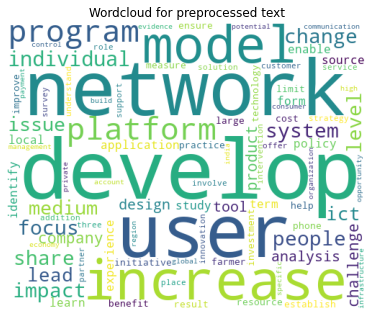

In [ ]:
# word cloud to check the spread of words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = '' 

# to extract most common words
for arg in df["content"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Wordcloud for preprocessed text") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# now let's introduce dummy variables to display file classes aka intervention areas
# The below code will speerate the 
df2 = pd.concat([df, df['fileclass'].str.get_dummies(sep=', ')], axis=1)

In [ ]:
df2.drop("fileclass", axis=1, inplace=True)

In [ ]:
df2.head(5)

,content,ChildProtection,Cybersecurity,DataPrivacy,DataSystemsDevelopment,DigitalFinance,DigitalInclusion,DigitalInformatioServices,DigitalInfrastructure,DigitalLiteracy,DigitalServices,Egovernment,Upskilling
0,medium behaviour change communication linda ra...,0,0,0,0,0,1,0,0,0,0,0,0
1,teacher attitude integrate ict classroom instr...,0,0,0,0,0,0,0,0,1,0,0,1
2,papua guinea consumer protection diagnostic pa...,0,0,0,0,1,0,0,0,0,0,0,0
3,inclusion maldives findex survey september dis...,0,0,0,0,1,1,0,0,0,0,0,0
4,draft final discount withdrawal fee catalyse m...,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
# Display the entire record for index 0
df2.loc[42, :]

content                      nm julio diciembre gender igital divide maya s...
ChildProtection                                                              0
Cybersecurity                                                                0
DataPrivacy                                                                  0
DataSystemsDevelopment                                                       0
DigitalFinance                                                               0
DigitalInclusion                                                             1
DigitalInformatioServices                                                    0
DigitalInfrastructure                                                        0
DigitalLiteracy                                                              1
DigitalServices                                                              0
Egovernment                                                                  1
Upskilling                                          

In [ ]:
df2.to_csv("/Users/uvini/Downloads/preprocessed.csv",index=True)

In [ ]:
df2["content"].iloc[42]

'nm julio diciembre gender igital divide maya speak southern mexico de gnero en maya en el de mxico de gnero em de mxico gabriel castillo autonomous university mxico alonso autonomous university mxico sergio autonomous university mxico nm julio diciembre abstract divide phenomenon early telecommunication management numerous study author agree basic premise divide difference individual society compute telecommunication resource van dijk hacker oecd wagner element society function properly phenomenon main emphasis marginal contact exclude successful incorporation analysis focus gender difference technologie trai ning program call reduction divide vulnerable young people vulnerable southern speak discuss mexico plan strategy guideline compare parameter plan keywords divide gender train program el como divide surge en los de los con la del el desarrollo de la telecomunicaciones en el de la informacin est van dijk hacker wagner en la de la la los de telecomunicaciones los el mayor de este s